<a href="https://colab.research.google.com/github/qedir314/BTK-Akademi/blob/main/8_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents

1. [Importing Libraries](#importing-libraries)
2. [Loading Data](#loading-data)
3. [Univariate Variable Analysis](#univariate-variable-analysis)
  1. [Categorical Variable](#categorical-variable)
  2. [Numeric Variable](#numeric-variable)
4. [Basic Data Analysis](#basic-data-analysis)
5. [Outlier Detection](#outlier-detection)
6. [Missing Value](#missing-value)
  1. [Finding Missing Value](#finding-missing-value)
  2. [Filling Missing Value](#filling-missing-value)
7. [Visualization](#visualization)
8. [Fill Missing Age Feature](#fill-missing-age-feature)
9. [Feature Engineering](#feauture-engineering)
10. [Modeling](#modeling)

## Importing Libraries

In [361]:
# Before Add kaggle.json API
!mkdir /.kaggle
!mv kaggle.json /.kaggle
!mv /.kaggle /root/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/.kaggle’: File exists
mv: cannot stat 'kaggle.json': No such file or directory
mv: cannot move '/.kaggle' to '/root/.kaggle': Directory not empty


In [362]:
!pip install kaggle
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [363]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use("seaborn-whitegrid")
import seaborn as sns

from collections import Counter
import warnings
warnings.filterwarnings("ignore")

import os

## Loading data

In [365]:
train_df = pd.read_csv('/content/train.csv')
# test_df = pd.read_csv('/content/test.csv')

In [366]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [367]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [368]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [369]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Univariate Variable Analysis

### Categorical Variable

In [370]:
def bar_plot(categories):
  for i, c in enumerate(category1):
    plt.figure(figsize=(6,4))
    var = train_df[c]
    # counting number of categorical value
    var_count = var.value_counts()
    plt.tight_layout()
    plt.bar(var_count.index, var_count)
    plt.xticks(var_count.index, var_count.index.values)
    plt.title(c)
    plt.show()

    print(f"{var_count}")

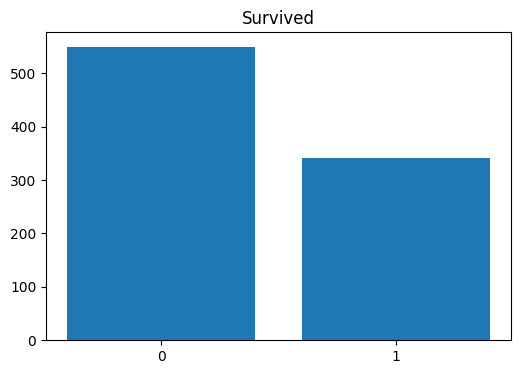

Survived
0    549
1    342
Name: count, dtype: int64


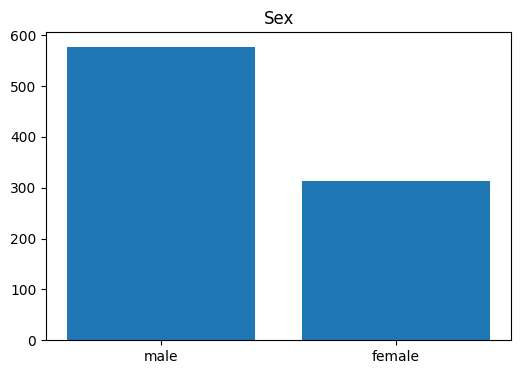

Sex
male      577
female    314
Name: count, dtype: int64


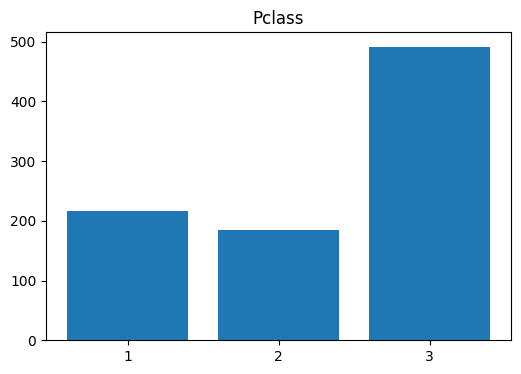

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


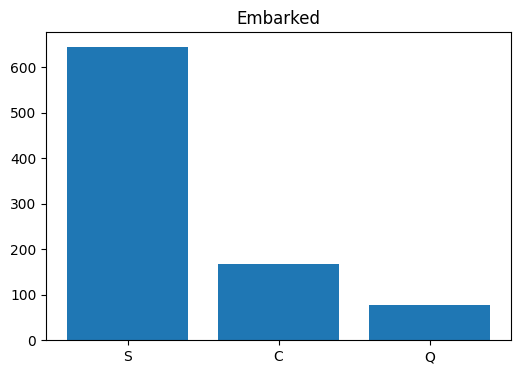

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


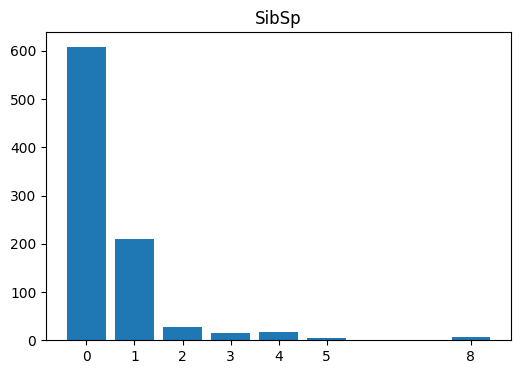

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


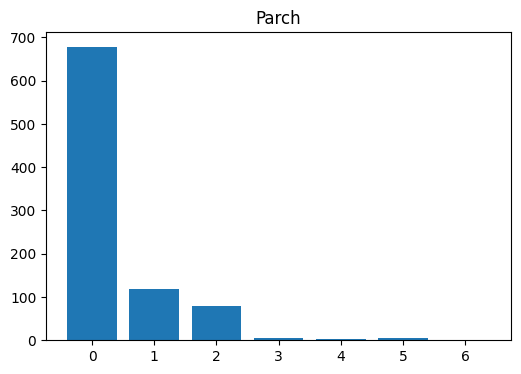

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [371]:
category1 = ['Survived', 'Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']

bar_plot(category1)

In [372]:
category2 = ['Cabin', 'Name', 'Ticket']
for c in category2:
  print(f'{train_df[c].value_counts()}')
  print()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64



### Numeric Variable

In [373]:
def plot_hist(variable):
  plt.figure(figsize=(9,3))
  plt.hist(train_df[variable], bins=50)
  plt.xlabel(variable)
  plt.title(f"{variable} distribution")
  plt.show()

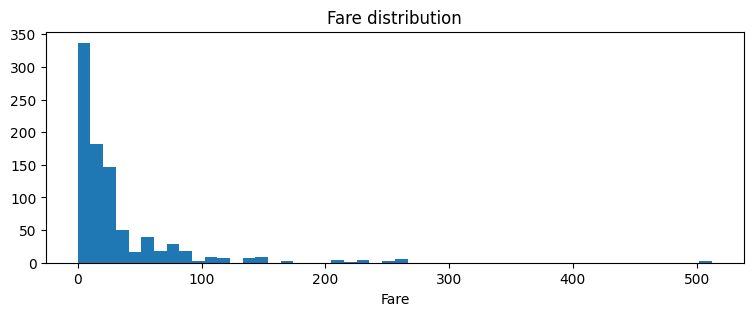

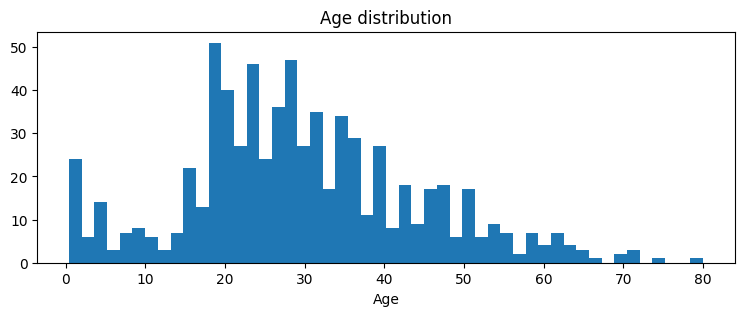

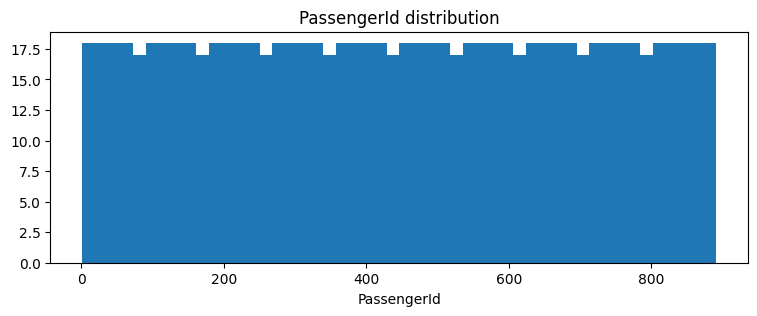

In [374]:
numeric_variables = ['Fare', 'Age', 'PassengerId']
for variable in numeric_variables:
  plot_hist(variable)

## Basic Data Analysis

In [375]:
# Pclass vs Survived
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by = 'Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [376]:
# Sex vs Survived
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values('Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [377]:
# SibSp vs Survived
train_df[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values('Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [378]:
# Parch vs Survived
train_df[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values('Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Outlier Detection

In [379]:
def detect_outliers(df, features):
  outlier_indices = []

  for c in features:
    # First Quartile
    Q1 = np.percentile(df[c], 25)

    # Third Quartile
    Q3 = np.percentile(df[c], 75)

    # Outlier Step
    outlier_step = (Q3 - Q1) * 1.5

    # detecting outlier indices
    outlier_list_col = df[ (df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step) ].index
    # storing all indices
    outlier_indices.extend(outlier_list_col)

  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(i for i,v in outlier_indices.items() if v > 2)
  return multiple_outliers

In [380]:
features = ['Age', 'Fare', 'SibSp', 'Parch']
train_df.loc[detect_outliers(train_df, features)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [381]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df, features), axis=0).reset_index(drop=True)

## Missing value

In [382]:
train_df_len = len(train_df)
train_df_len

881

### Finding Missing Value

In [383]:
train_df.columns[train_df.isna().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [384]:
print(train_df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64


### Filling Missing Value

In [385]:
train_df[train_df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


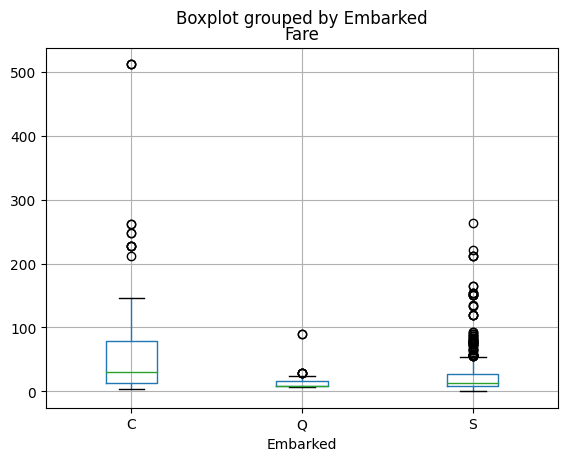

In [386]:
train_df.boxplot(column='Fare', by='Embarked')
plt.show()

In [387]:
train_df['Embarked'] = train_df['Embarked'].fillna('C')
train_df[train_df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [388]:
train_df[train_df['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [389]:
train_df['Fare'] = train_df['Fare'].fillna(np.mean(train_df[train_df["Pclass"]== 3]['Fare']))

In [390]:
train_df[train_df['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Visualization

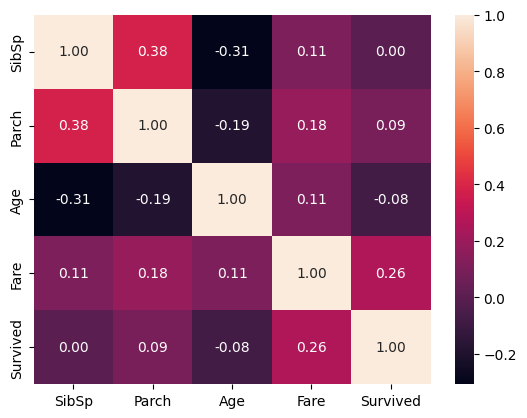

In [391]:
list1 = ['SibSp', 'Parch', 'Age', 'Fare', 'Survived']
sns.heatmap(train_df[list1].corr(), annot=True, fmt = '.2f')
plt.show()

SibSp -- Survived

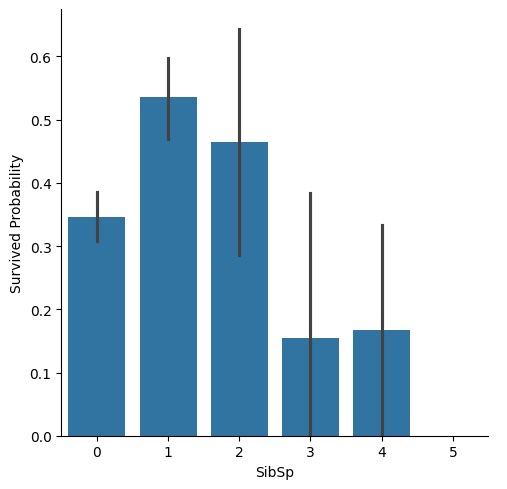

In [392]:
g = sns.catplot(x = 'SibSp', y = 'Survived', data=train_df, kind = 'bar')
g.set_ylabels('Survived Probability')
plt.show()

Parch -- Survived

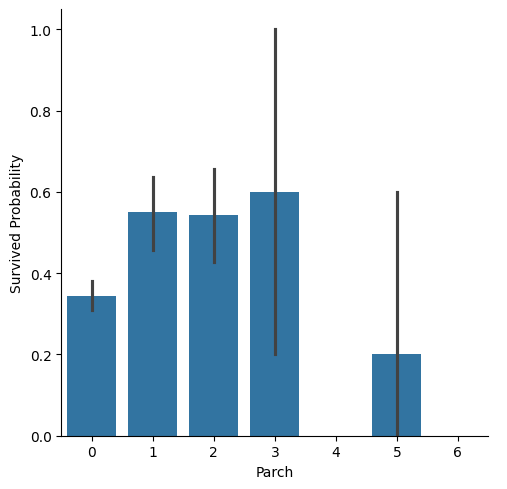

In [393]:
g = sns.catplot(x = 'Parch', y = 'Survived', data=train_df, kind = 'bar')
g.set_ylabels('Survived Probability')
plt.show()

Pclass -- Survived

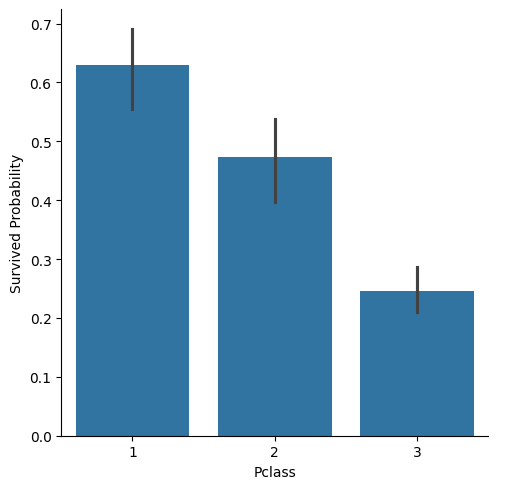

In [394]:
g = sns.catplot(x = 'Pclass', y = 'Survived', data=train_df, kind='bar')
g.set_ylabels("Survived Probability")
plt.show()

 Age -- Survived

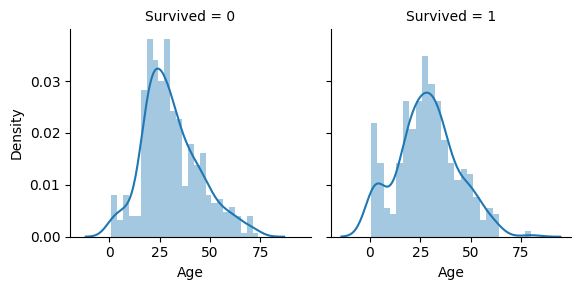

In [395]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(sns.distplot, 'Age', bins=25)


**Pclass -- Survived -- Age**

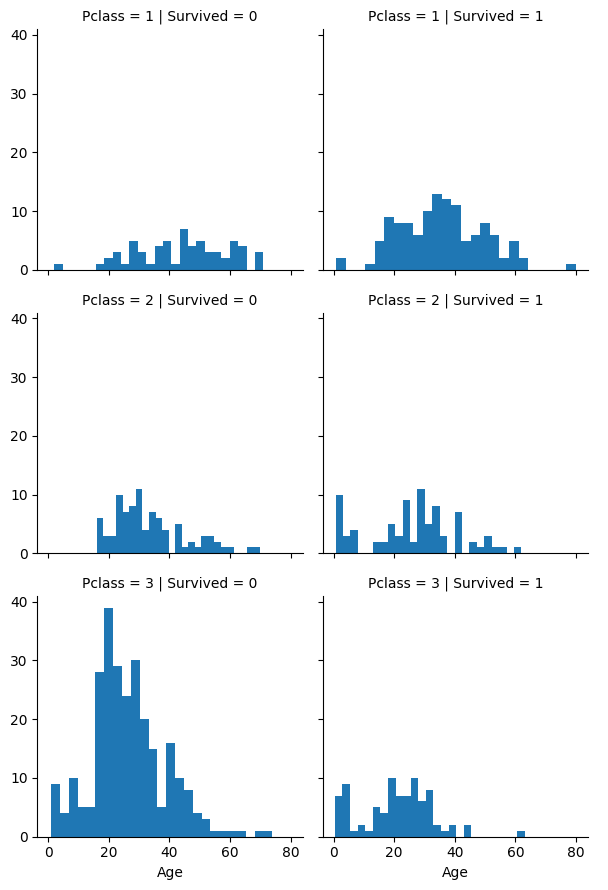

In [396]:
g = sns.FacetGrid(train_df, col = 'Survived', row ='Pclass')
g.map(plt.hist, 'Age', bins=25)
g.add_legend()
plt.show()

Embarked -- Sex -- Pclass -- Survived

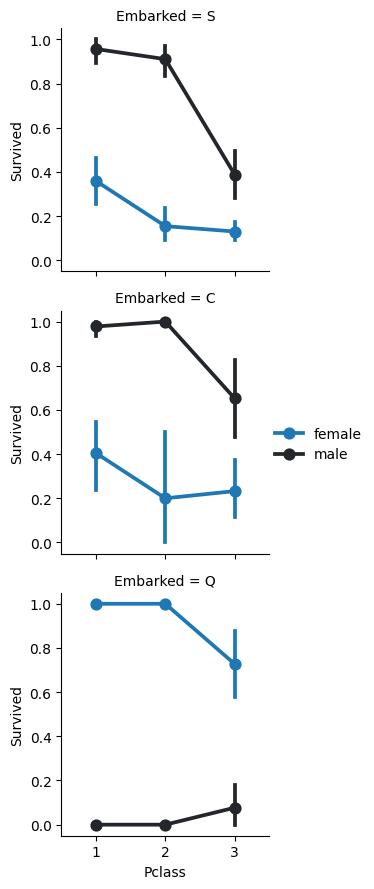

In [397]:
g = sns.FacetGrid(train_df, row = 'Embarked')
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
g.add_legend()
plt.show()

Embarked -- Sex -- Fare -- Survived

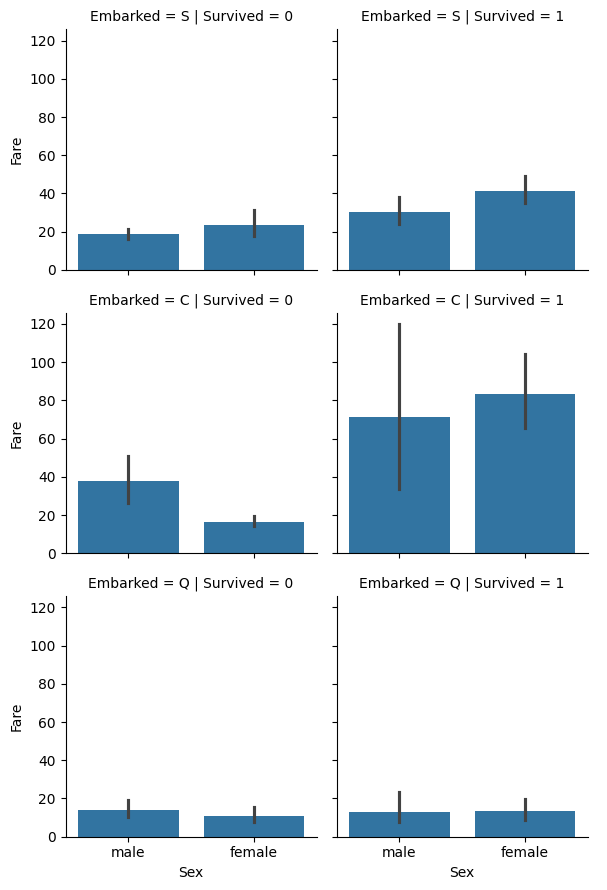

In [398]:
g = sns.FacetGrid(train_df, row='Embarked', col='Survived')
g.map(sns.barplot, 'Sex', 'Fare')
g.add_legend()
plt.show()

## Fill Missing Age Feature

In [399]:
train_df[train_df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
840,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
850,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
858,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
868,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


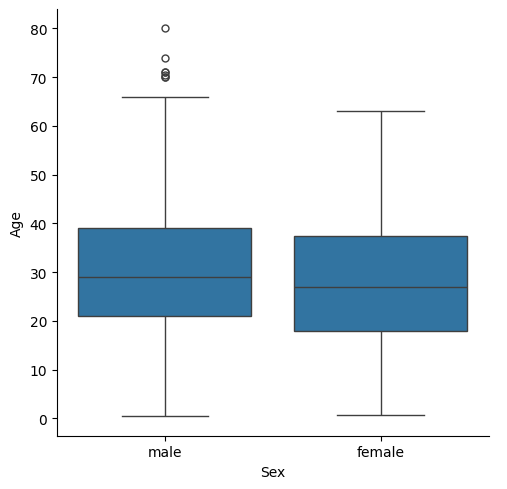

In [400]:
sns.catplot(x = 'Sex', y = 'Age', data=train_df, kind='box')
plt.show()

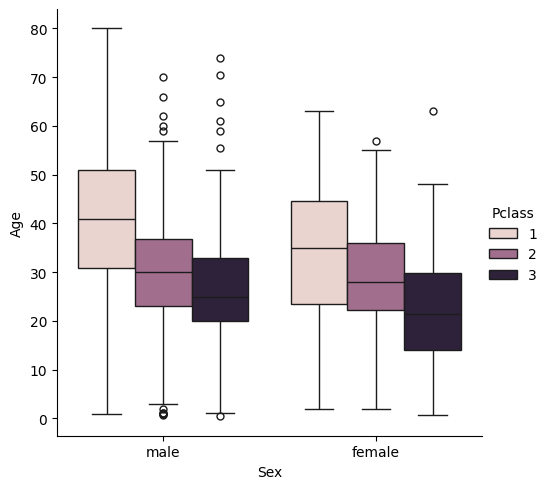

In [401]:
sns.catplot(x = 'Sex', y = 'Age', hue = 'Pclass', data = train_df, kind = 'box')
plt.show()

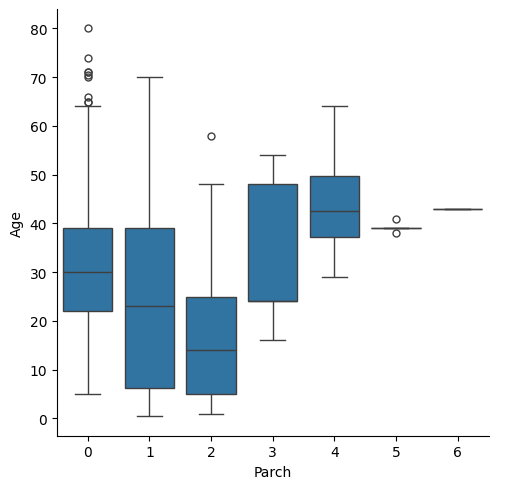

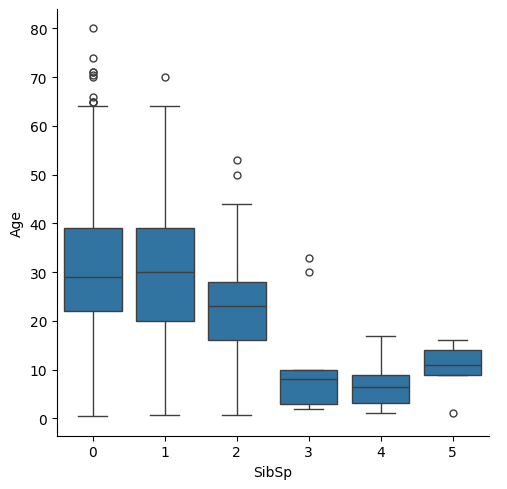

In [402]:
sns.catplot(x = 'Parch', y = 'Age', data = train_df, kind = 'box')
sns.catplot(x = 'SibSp', y = 'Age', data = train_df, kind = 'box')
plt.show()

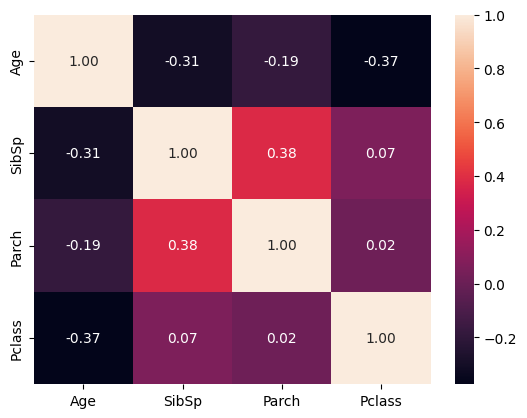

In [403]:
sns.heatmap(train_df[['Age', 'Sex', 'SibSp', 'Parch', 'Pclass']].corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

In [404]:
index_nan_age = list(train_df['Age'][train_df['Age'].isna()].index)
for i in index_nan_age:
  age_pred = train_df['Age'][ ( ( train_df['SibSp'] == train_df.iloc[i]['SibSp'] ) &
                              ( train_df['Parch'] == train_df.iloc[i]['Parch'] ) &
                                train_df['Pclass'] == train_df.iloc[i]['Parch']  ) ].median()
  age_med = train_df['Age'].median()
  if not np.isnan(age_pred):
    train_df['Age'].iloc[i] = age_pred
  else:
    train_df['Age'].iloc[i] = age_med

In [405]:
train_df[train_df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Feauture Engineering

### Name -- Title

In [406]:
train_df['Name'].head(10)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


In [407]:
name = train_df['Name']
train_df['Title'] = [i.split(".")[0].split(",")[1].strip() for i in name]
train_df['Title'].value_counts()

,count
Title,
Mr,513
Miss,177
Mrs,125
Master,39
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


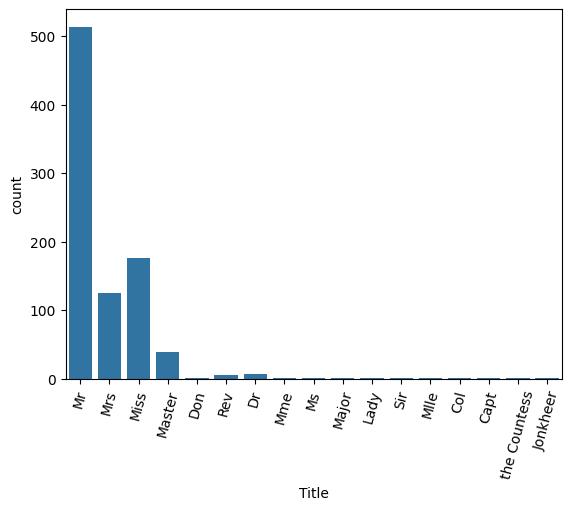

In [408]:
sns.countplot(x = 'Title', data = train_df)
plt.xticks(rotation=75)
plt.show()

In [409]:
# Converting to categorical
train_df['Title'] = train_df['Title'].replace(['Don', 'Dona', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer'], 'Other')
train_df['Title'] = [0 if i == 'Master' else 1 if i in ['Ms', 'Mlle', 'Mrs', 'Miss']  else 2 if i == 'Mr' else 3 for i in train_df['Title']]
print(train_df['Title'].tail(20))

861    1
862    2
863    2
864    1
865    1
866    2
867    2
868    2
869    1
870    1
871    2
872    1
873    2
874    2
875    1
876    3
877    1
878    1
879    2
880    2
Name: Title, dtype: int64


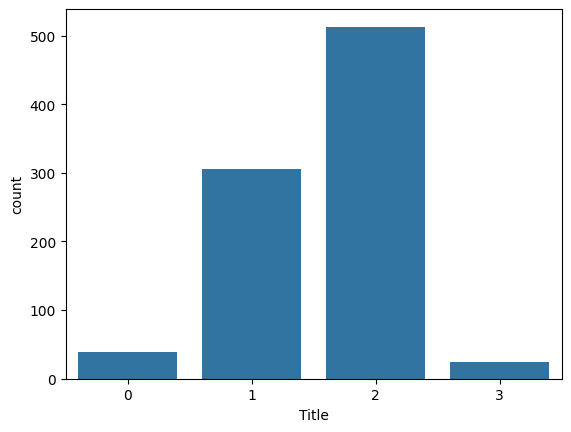

In [410]:
sns.countplot(x = 'Title', data = train_df)
plt.show()

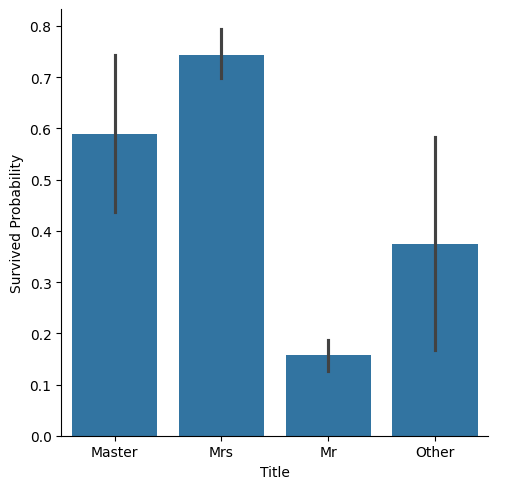

In [411]:
g = sns.catplot(x = 'Title', y = 'Survived', data = train_df, kind = 'bar')
g.set_xticklabels(['Master', 'Mrs', 'Mr', 'Other'])
g.set_ylabels('Survived Probability')
plt.show()

In [412]:
train_df.drop(labels = ['Name'], axis =1, inplace = True)

In [413]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [414]:
train_df = pd.get_dummies(train_df, columns = ['Title'], dtype = np.uint8)   # one hot encoding
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


### Family -- Size

In [415]:
train_df['Fsize'] = train_df['SibSp'] + train_df['Parch'] + 1

In [416]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


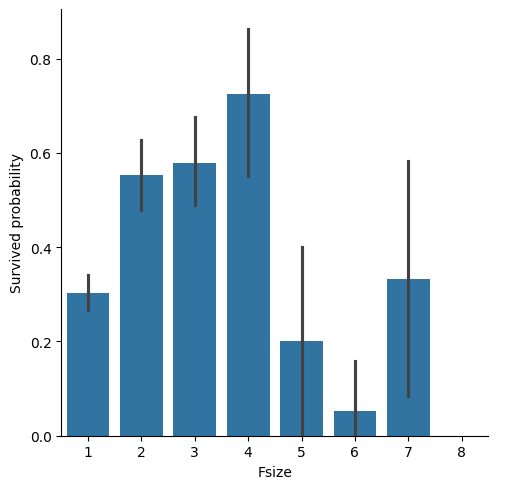

In [417]:
g = sns.catplot(x = 'Fsize', y ='Survived', data = train_df, kind = 'bar')
plt.ylabel('Survived probability')
plt.show()

In [418]:
train_df['Family_size'] = [1 if i < 5 else 0 for i in train_df['Fsize']]

In [419]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,Family_size
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1


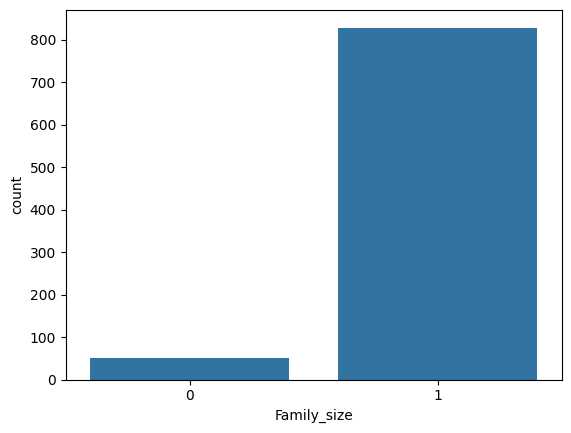

In [420]:
sns.countplot(x = 'Family_size', data = train_df)
plt.show()

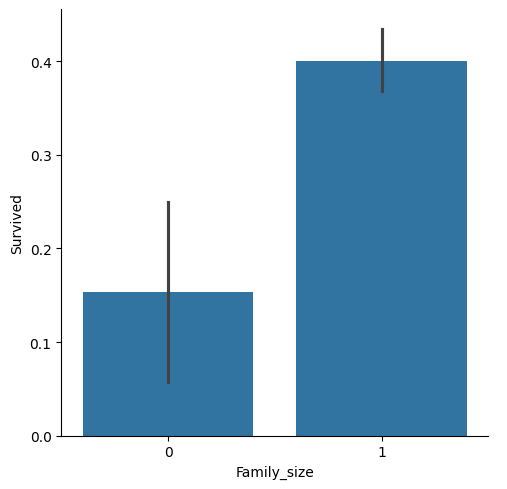

In [421]:
g = sns.catplot(x = 'Family_size', y = 'Survived', data = train_df, kind = 'bar')
plt.show()

In [422]:
train_df = pd.get_dummies(train_df, columns = ['Family_size'], dtype = np.uint8)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,Family_size_0,Family_size_1
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1


### Embarked

In [423]:
train_df['Embarked'].head(3)

,Embarked
0,S
1,C
2,S


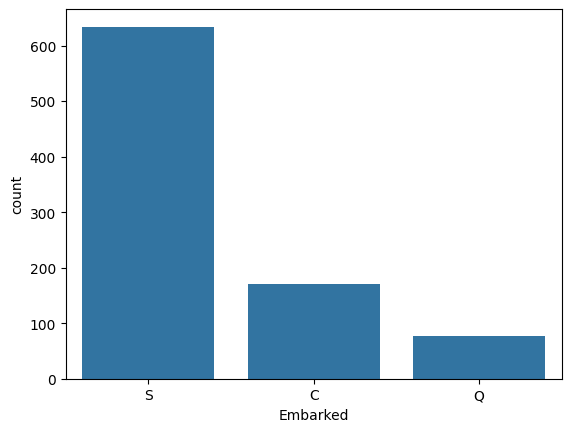

In [424]:
g = sns.countplot(x = 'Embarked', data = train_df)
plt.show()

In [425]:
train_df = pd.get_dummies(train_df, columns = ['Embarked'], dtype=np.uint8)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,Family_size_0,Family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


### Ticket

In [426]:
print(train_df['Ticket'].head(20))

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object


In [427]:
tickets = []
for i in list(train_df['Ticket']):
  if not i.isdigit():
    tickets.append(i.replace('.','').replace('/','').strip().split(' ')[0])
  else:
    tickets.append('x')
train_df['Ticket'] = tickets

In [428]:
print(train_df['Ticket'].head(20))

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object


In [429]:
print(train_df['Ticket'].value_counts())

Ticket
x          658
PC          60
CA          34
A5          21
SOTONOQ     15
STONO       12
WC          10
SCPARIS      7
A4           7
STONO2       6
SOC          6
FCC          5
C            5
SCParis      4
LINE         4
WEP          3
SCAH         3
SOPP         3
PP           3
SOTONO2      2
SWPP         2
PPP          2
FC           1
AS           1
SCOW         1
SC           1
SP           1
Fa           1
SOP          1
SCA4         1
CASOTON      1
Name: count, dtype: int64


In [430]:
train_df = pd.get_dummies(train_df, columns = ['Ticket'], prefix = 'T', dtype = np.uint8)
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x
0,1,0,3,male,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,female,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,0,1,0,0,0,0
3,4,1,1,female,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1


### Pclass

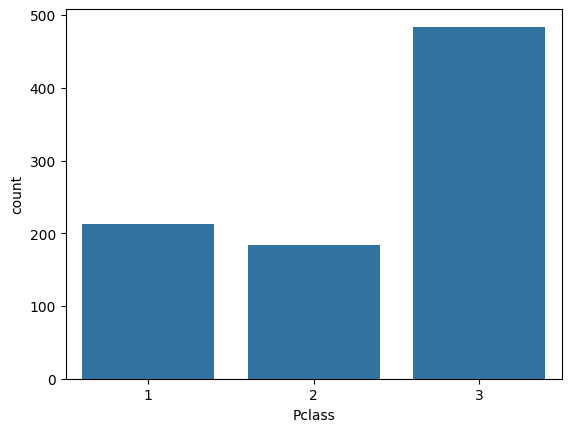

In [431]:
g = sns.countplot(x = 'Pclass', data = train_df)
plt.show()

In [432]:
train_df['Pclass'] = train_df['Pclass'].astype('category')    # for allowing encoder
train_df = pd.get_dummies(train_df, columns = ['Pclass'], dtype = np.uint8)
train_df.head(5)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0,male,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,female,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,female,26.0,0,0,7.9250,NaN,0,1,...,0,0,1,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0,male,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


### Sex

In [433]:
train_df['Sex'] = train_df['Sex'].astype('category')   # could be good in large datasets and memory-efficient
train_df = pd.get_dummies(train_df, columns = ['Sex'], dtype = np.uint8)
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1,26.0,0,0,7.9250,NaN,0,1,0,...,1,0,0,0,0,0,0,1,1,0
3,4,1,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


### Dropping PassengerId and Cabin

In [434]:
train_df.drop(labels = ['PassengerId', 'Cabin'], axis = 1, inplace = True)
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Fsize', 'Family_size_0', 'Family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A4', 'T_A5', 'T_AS', 'T_C',
       'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_PC', 'T_PP',
       'T_PPP', 'T_SC', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis',
       'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

## Modeling

In [435]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import  RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Train - Test Split

In [436]:
train = train_df[:train_df_len]
X_train = train_df.drop(labels = 'Survived', axis = 1)
y_train = train_df['Survived']

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((590, 50), (291, 50), (590,), (291,))

### Simple Logistic Regression

In [438]:
log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train, y_train)
print(f"Training score : {log_reg.score(X_train, y_train)*100:.2f}")
print(f"Test score: {log_reg.score(X_test, y_test)*100:.2f}")

Training score : 82.71
Test score: 82.47


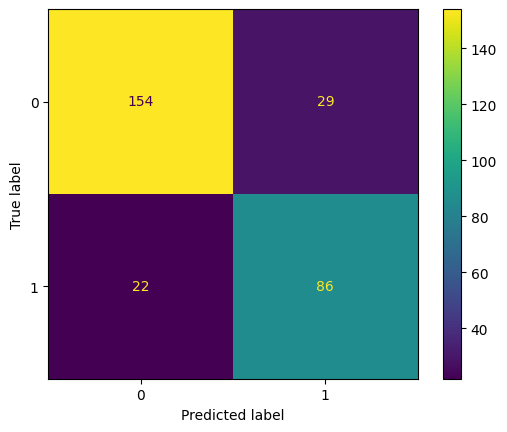

In [439]:
y_pred = log_reg.predict(X_test)
conf_matrix = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()

### Hyperparamater Tuning -- GridSearch -- Cross Validation

In [440]:
random_state = 42
classifiers = [DecisionTreeClassifier(random_state = random_state),
               KNeighborsClassifier(),
               LogisticRegression(random_state = random_state),
               RandomForestClassifier(random_state = random_state),
               SVC(random_state = random_state)]

dt_param_grid = {'min_samples_split' : range(10, 500, 50),
                 'max_depth' : range(1, 20, 2)}

knn_param_grid = {'n_neighbors' : np.linspace(10,19,10, dtype = int).tolist(),
                  'weights' : ['uniform', 'distance'],
                  'metric' : ['euclidean', 'manhattan']}

logreg_param_grid = {'C' : np.logspace(-3, 3, 7),
                     'penalty' : ['l1', 'l2']}

rfc_param_grid = {'max_features' : range(1,10,4),
                  'min_samples_split' : range(2,11,4),
                  'min_samples_leaf' : [1, 21, 10],
                  'bootstrap' : [False],
                  'n_estimators' : [100,500],
                  'criterion' : ['gini']}

svc_param_grid = {'gamma' : [0.001, 0.01, 0.1, 1.0],
                  'C' : [1, 10, 50, 100, 500]}

classifier_params = [dt_param_grid, knn_param_grid, logreg_param_grid, rfc_param_grid, svc_param_grid]

In [441]:
cv_results = []
best_estimators = []
for i in range(len(classifiers)):
  clf = GridSearchCV(classifiers[i], param_grid = classifier_params[i], cv = StratifiedKFold(n_splits=5), scoring = 'accuracy', n_jobs = -1, verbose=1)
  clf.fit(X_train, y_train)
  cv_results.append(clf.best_score_)
  best_estimators.append(clf.best_estimator_)
  print(cv_results[i])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
0.8355932203389831
Fitting 5 folds for each of 40 candidates, totalling 200 fits
0.7745762711864408
Fitting 5 folds for each of 14 candidates, totalling 70 fits
0.8220338983050848
Fitting 5 folds for each of 54 candidates, totalling 270 fits
0.8322033898305085
Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.8016949152542374


In [442]:
cv_results_df = pd.DataFrame({'ML Models' : ['DecisionTreeClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier', 'SVC'],
                          'Cross Validation Accuracy Means' : cv_results})
cv_results_df

,ML Models,Cross Validation Accuracy Means
0,DecisionTreeClassifier,0.835593
1,KNeighborsClassifier,0.774576
2,LogisticRegression,0.822034
3,RandomForestClassifier,0.832203
4,SVC,0.801695


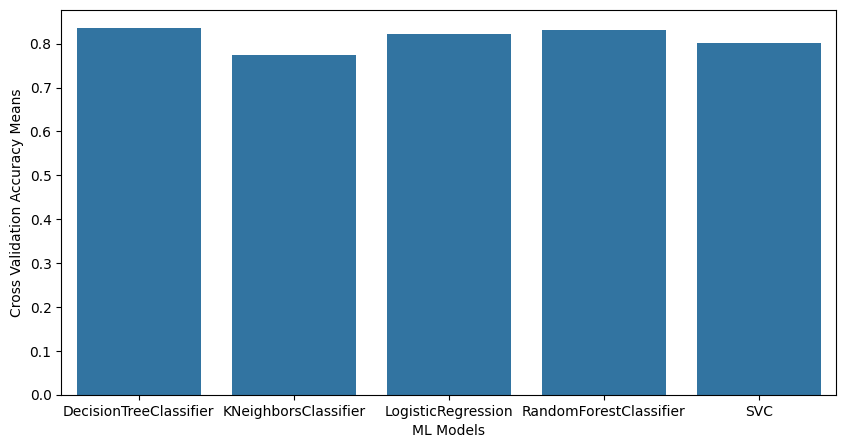

In [443]:
plt.figure(figsize=(10,5))
s = sns.barplot(cv_results_df, x = 'ML Models', y ='Cross Validation Accuracy Means')
plt.show()

### Ensemble Modeling

In [444]:
votingC = VotingClassifier(estimators = [('dt', best_estimators[0]),
                                         ('rfc', best_estimators[3]),
                                         ('lr', best_estimators[2])],
                           voting = 'hard', n_jobs = -1)
votingC.fit(X_train, y_train)
votingC.score(X_test, y_test)

0.8213058419243986

### Neural Network

In [445]:
import tensorflow as tf

In [446]:
class Model(tf.keras.Model):
  def __init__(self, units=75, activation='relu', **kwargs):
    super().__init__(**kwargs)
    self.flatten = tf.keras.layers.Flatten()
    self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
    self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
    self.hidden3 = tf.keras.layers.Dense(units, activation=activation)
    self.hidden4 = tf.keras.layers.Dense(units, activation=activation)
    self.output_layer = tf.keras.layers.Dense(1, activation='sigmoid')
  def call(self, inputs):
    flatten = self.flatten(inputs)
    hidden1 = self.hidden1(flatten)
    hidden2 = self.hidden2(hidden1)
    hidden3 = self.hidden3(hidden2)
    hidden4 = self.hidden4(hidden3)
    output = self.output_layer(hidden4)
    return output

model = Model(75, 'relu', name = 'model')

In [447]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile(loss=('binary_crossentropy'), optimizer=optimizer, metrics=['Accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - Accuracy: 0.4824 - loss: 0.8248 - val_Accuracy: 0.6735 - val_loss: 0.6090
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.6862 - loss: 0.6009 - val_Accuracy: 0.6838 - val_loss: 0.5969
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.6740 - loss: 0.6055 - val_Accuracy: 0.7079 - val_loss: 0.6032
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.6924 - loss: 0.5947 - val_Accuracy: 0.6942 - val_loss: 0.5811
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.7486 - loss: 0.5588 - val_Accuracy: 0.7285 - val_loss: 0.5592
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.7087 - loss: 0.5743 - val_Accuracy: 0.7285 - val_loss: 0.5492
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.7400 - loss: 0.5280 - val_Accuracy: 0.7526 - val_loss: 0.5466
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.7750 - loss: 0.4939 - val_Accuracy: 0.7869 - val_loss

In [448]:
model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 75)                  │           3,825 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 75)                  │           5,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 75)                  │           5,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 75)                  │           5,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              76 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,005 (246.12 KB)

 Trainable params: 21,001 (82.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 42,004 (164.08 KB)

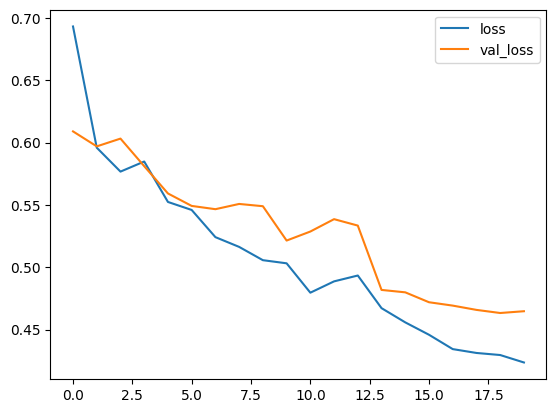

In [449]:
plt.plot(history.history['loss'], label ='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

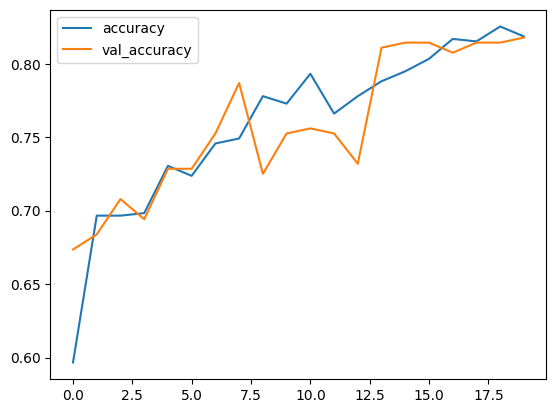

In [454]:
plt.plot(history.history['Accuracy'], label ='accuracy')
plt.plot(history.history['val_Accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()